[View in Colaboratory](https://colab.research.google.com/github/Hironobu-Kawaguchi/Hello-World/blob/master/hkcolab_mnist_cnn.ipynb)

# 1.手書き文字(mnist）認識ディープラーニング（CNN）をやってみよう！

## 1.1.mnistダウンロード、加工
60,000枚の学習用データ、10,000枚のテスト用データ

In [1]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 1.2.mnist学習用データの画像を確認

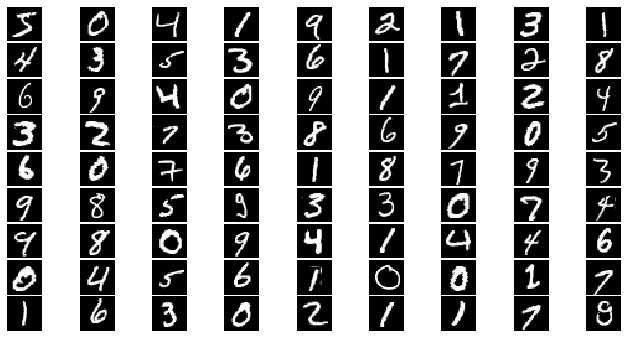

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

## 1.3.ディープラーニング実行！
8階層のCNNを12回学習。
GPUを使用すると約2分、GPUを使用しないと約30分かかります。
`model.add`がニューラルネットワークの設定部分です。

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))           # Conv2D       2次元の畳み込みレイヤー
model.add(Conv2D(64, (3, 3), activation='relu'))     # Conv2D       2次元の畳み込みレイヤー
model.add(MaxPooling2D(pool_size=(2, 2)))            # MaxPooling2D 空間データのマックスプーリング演算
model.add(Dropout(0.25))                             # Dropout      入力にドロップアウトを適用する．訓練時の更新においてランダムに入力ユニットを0とする割合であり，過学習の防止に役立ちます．
model.add(Flatten())                                 # Flatten      入力を平滑化する．バッチサイズに影響を与えません．
model.add(Dense(128, activation='relu'))             # Dense        通常の全結合ニューラルネットワークレイヤー．
model.add(Dropout(0.5))                              # Dropout      入力にドロップアウトを適用する．訓練時の更新においてランダムに入力ユニットを0とする割合であり，過学習の防止に役立ちます．
model.add(Dense(num_classes, activation='softmax'))  # Dense        通常の全結合ニューラルネットワークレイヤー．

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 233us/step - loss: 0.2700 - acc: 0.9172 - val_loss: 0.0617 - val_acc: 0.9781
Epoch 2/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0921 - acc: 0.9730 - val_loss: 0.0451 - val_acc: 0.9855
Epoch 3/12
21504/60000 [=========>....................] - ETA: 6s - loss: 0.0739 - acc: 0.9774

60000/60000 [==============================] - 11s 181us/step - loss: 0.0666 - acc: 0.9804 - val_loss: 0.0357 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 11s 181us/step - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 5/12
47488/60000 [======================>.......] - ETA: 2s - loss: 0.0493 - acc: 0.9856

60000/60000 [==============================] - 11s 188us/step - loss: 0.0484 - acc: 0.9857 - val_loss: 0.0277 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0421 - acc: 0.9875 - val_loss: 0.0288 - val_acc: 0.9899
Epoch 7/12
56448/60000 [===========================>..] - ETA: 0s - loss: 0.0388 - acc: 0.9884

60000/60000 [==============================] - 11s 182us/step - loss: 0.0391 - acc: 0.9883 - val_loss: 0.0309 - val_acc: 0.9895
Epoch 8/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0351 - acc: 0.9892 - val_loss: 0.0298 - val_acc: 0.9905
Epoch 9/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0288 - val_acc: 0.9905
Epoch 10/12
  896/60000 [..............................] - ETA: 10s - loss: 0.0169 - acc: 0.9911

60000/60000 [==============================] - 11s 182us/step - loss: 0.0299 - acc: 0.9912 - val_loss: 0.0259 - val_acc: 0.9915
Epoch 11/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0290 - val_acc: 0.9907
Epoch 12/12
47232/60000 [======================>.......] - ETA: 2s - loss: 0.0273 - acc: 0.9921

60000/60000 [==============================] - 11s 183us/step - loss: 0.0286 - acc: 0.9916 - val_loss: 0.0274 - val_acc: 0.9915
Test loss: 0.027436347066483176
Test accuracy: 0.9915


## 1.4.学習毎のロス率をグラフで確認
loss 学習データのロス率、val_loss テストデータのロス率

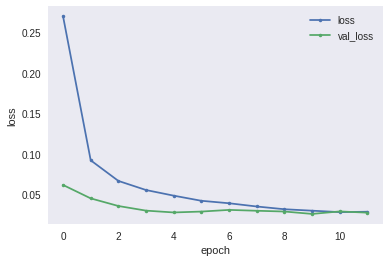

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 1.5.ニューラルネットワークのサマリ表示
8階層のニューラルネットワーク、学習パラメーター数は約120万
1. Conv2D       2次元の畳み込みレイヤー
1. Conv2D       2次元の畳み込みレイヤー
1. MaxPooling2D 空間データのマックスプーリング演算
1. Dropout      入力にドロップアウトを適用する．訓練時の更新においてランダムに入力ユニットを0とする割合であり，過学習の防止に役立ちます．
1. Flatten      入力を平滑化する．バッチサイズに影響を与えません．
1. Dense        通常の全結合ニューラルネットワークレイヤー．
1. Dropout      入力にドロップアウトを適用する．訓練時の更新においてランダムに入力ユニットを0とする割合であり，過学習の防止に役立ちます．
1. Dense        通常の全結合ニューラルネットワークレイヤー．


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## 1.6.学習結果の確認
ランダムにテストデータを10個選択し、検証

学習モデルの判定 / 正しい答え （学習モデルの予測確率）

〇 3 / 3 (100.0 %)
〇 0 / 0 (100.0 %)
〇 2 / 2 (100.0 %)
〇 8 / 8 (100.0 %)
〇 2 / 2 (99.999 %)
〇 0 / 0 (100.0 %)
〇 9 / 9 (100.0 %)
〇 5 / 5 (100.0 %)
〇 1 / 1 (99.998 %)
〇 1 / 1 (99.95 %)


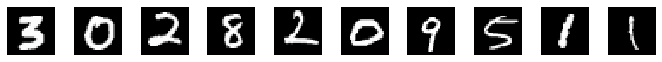

In [6]:
import  numpy as np
import  random
#新しいウィンドウを描画
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.4)
#テストデータをランダムに選択する準備
tstlist = list(range(10000))
random.shuffle(tstlist)
#ランダムに選択した10件を検証データとして表示
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[tstlist[i]].reshape((28, 28)), cmap='gray')
    
for i in range(10):
    #data = np.asarray(x_test[tstlist[i]]).reshape((-1, 784))
    data = np.asarray(x_test[tstlist[i]]).reshape((-1, 28,28,1))
    res = model.predict([data])[0]
    y = res.argmax()
    per = round(float(res[y] * 100),3) # --- 正解率を小数3桁精度(四捨五入)で求める
    ydata = y_test[tstlist[i]].argmax() # --- 正解
    if y == ydata:
        print("〇 {0} / {1} ({2} %)".format(y, ydata, per))
    else:
        print("× {0} / {1} ({2} %)".format(y, ydata, per))

## 1.7.学習したモデルとウェイトをファイルに保存

In [0]:
# モデルとウェイトをjsonとhdf5ファイルに保存
model_json_str = model.to_json()
open('mnist_cnn_model.json', 'w').write(model_json_str)
model.save_weights('mnist_cnn_weights.hdf5')

## 1.8.モデルとウェイトをファイルからロード

In [0]:
# モデルとウェイトをjsonとhdf5ファイルからロード
from keras.models import model_from_json
model = model_from_json(open('mnist_cnn_model.json').read())
model.load_weights('mnist_cnn_weights.hdf5')

# 2.Google Colabでのファイル操作

## 2.1.フォルダの内容表示

In [9]:
%ls

datalab/  mnist_cnn_model.json  mnist_cnn_weights.hdf5


## 2.2.ファイル操作のライブラリをインポート

In [0]:
from google.colab import files

## 2.3.ファイルをアップロード

In [11]:
uploaded = files.upload()

## 2.4.ファイルをダウンロード

In [0]:
files.download('mnist_cnn_model.json')

In [0]:
files.download('mnist_cnn_weights.hdf5')